# Mecánica Celeste: teoría, algoritmos y problemas
# Por Jorge I. Zuluaga

En estos cuadernos hemos compilado la mayoría de los códigos que vienen con el libro [**Mecánica Celeste: teoría, algoritmos y problemas**](https://www.libreriadelau.com/bw-mecanica-celeste-teoria-algoritmos-y-problemas-u-de-antioquia-fisica/p). En cada cuaderno encontrará códigos de secciones o capítulos enteros. Para explicaciones detalladas de lo que hacen los códigos refiérase a la sección o capítulo respectivo. Para mayor comodidad puede leer o ejecutar este cuaderno usando `Google Colab`.

<a target="_blank" href="https://colab.research.google.com/github/seap-udea/pymcel/blob/main/ejemplos/cuadernos-libro/mcel_zuluaga-11-doscuerpos_motivacion_a_orbita_osculatriz.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Algorítmos del Problema de los dos Cuerpos: motivación a orbita osculatriz

### Instalación e importación

Si está usando este cuaderno en `Colab` debería instalar `pymcel` antes de comenzar: 

In [16]:
!pip install -Uq pymcel

In [1]:
# Este código se usa solamente para desarrollar estos cuadernos pero es inocuo en otros contextos
%load_ext autoreload 
%autoreload 2

### Motivación y sistemas jerárquicos

Simulamos un sistema de tres cuerpos y graficamos la trayectoria en 3D:

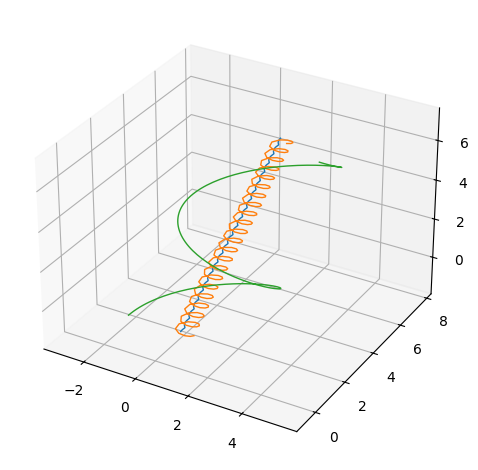

In [3]:
sistema=[
    dict(
        m=10.0,
        r=[1,0,0],
        v=[0,1,0.5]),
    dict(
        m=1.0,
        r=[1.5,0,0],
        v=[0,-3,1],
    ),
    dict(
        m=0.1,
        r=[-1,0,0],
        v=[0,3,0],
    )
]

from numpy import linspace

#Solución
from pymcel.export import ncuerpos_solucion 
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,
                                           linspace(0.0,10.0,200))

#Gráfica en el sistema de referencia inercial original
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rs,vs)

Si nos pasamos al sistema del centro de masa nos damos cuenta que el movimiento es más sencillo:

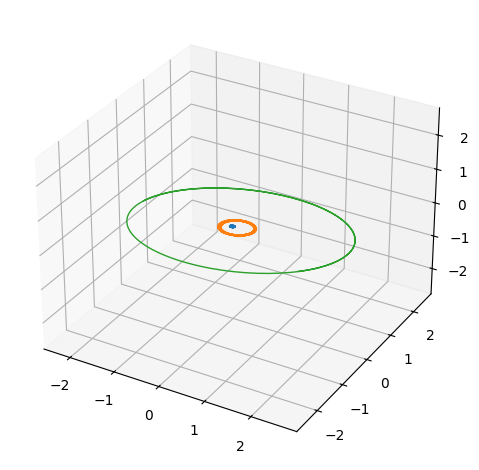

In [4]:
#Gráfica en el sistema de referencia del centro de masa
from pymcel.export import plot_ncuerpos_3d
fig=plot_ncuerpos_3d(rps,vps);

### El hodografo del sistema de los dos cuerpos

Para estudiar el hodógrafo de los dos cuerpos escogemos unas condiciones iniciales específicas y calculamos las propiedades de la órbita resultante:

In [7]:
#Condiciones iniciales
mu=1 #unidades canónicas (u.c.)
from numpy import array
x0=1.0 #u.c.
vy0=0.73 #u.c.

#Magnitud de h
h=x0*vy0

#Energía específica relativa
from numpy.linalg import norm
epsilon=0.5*vy0**2-mu/x0

#Parámetros geométricos derivados
from numpy import sqrt
p=h**2/mu
e=sqrt(1+2*epsilon*h**2/mu**2)
a=p/(1-e**2)

print(f"p = {p}")
print(f"a = {a}")
print(f"e = {e}")

p = 0.5328999999999999
a = 0.6816167950378297
e = 0.46710000000000007


Ahora calcularemos las componentes de la velocidad de la partícula:

In [8]:
#Valores de la anomalía verdadera
from numpy import linspace,pi
fs=linspace(0,2*pi,100)

#Valores de r
from numpy import sin,cos
rs=p/(1+e*cos(fs))

#Valores de v
vs=sqrt(mu*(2/rs-1/a))

#Valores de phi
from numpy import arcsin,zeros_like
phis=zeros_like(fs)
for i,f in enumerate(fs):
    if f<pi:
        phis[i]=arcsin(h/(rs[i]*vs[i]))
    else:
        phis[i]=pi-arcsin(h/(rs[i]*vs[i]))

#Valores de tetav
from numpy import mod
tetavs=phis+fs

#Componentes de la velocidad
from numpy import sin
vxs=vs*cos(tetavs)
vys=vs*sin(tetavs)

Graficamos las componentes para poner en evidencia el hodografo:

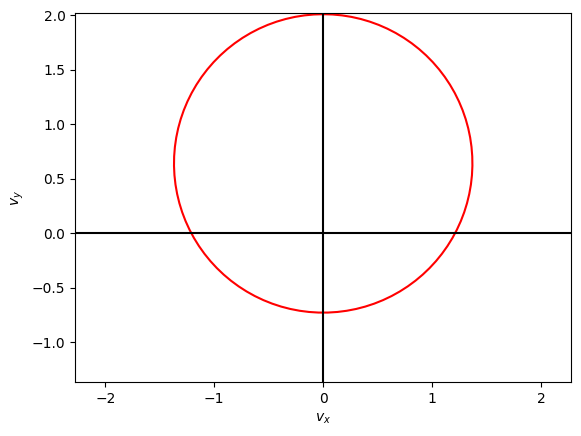

In [9]:
import matplotlib.pyplot as plt
fig=plt.figure()
ax=fig.gca()

#Grafica
ax.plot(vxs,vys,'r')

#Decoración
from pymcel.plot import fija_ejes_proporcionales
valores=(vxs,vys)
xrango,yrango=fija_ejes_proporcionales(ax,valores,xcm=0)

#Dibuja ejes
ax.plot(xrango,[0,0],'k-');
ax.plot([0,0],yrango,'k-');
ax.set_xlabel("$v_x$");
ax.set_ylabel("$v_y$");

### La órbita osculatriz

Resolvemos numéricamente un sistema de 2 cuerpos:

In [10]:
from numpy import array
sistema=[
    dict(m=1.0,
         r=array([0.0,0.0,+0.3]),
         v=array([+1.0,0.0,0.5])),
    dict(m=0.5,
         r=array([+1.0,0.0,0.0]),
         v=array([0.0,+1.0,0.0])),
]

# Propiedades del sistema
from numpy.linalg import norm
mu=sistema[0]["m"]+sistema[1]["m"]
rvec=sistema[0]["r"]-sistema[1]["r"]
r=norm(rvec)
vvec=sistema[0]["v"]-sistema[1]["v"]
v=norm(vvec)

print(f"mu = {mu}")
print(f"r_vec = {rvec}")
print(f"r = {r}")
print(f"v_vec = {vvec}")
print(f"v = {v}")

mu = 1.5
r_vec = [-1.   0.   0.3]
r = 1.044030650891055
v_vec = [ 1.  -1.   0.5]
v = 1.5


A partir de las condiciones iniciales calculamos los vectores clave:

In [12]:
from numpy import cross
from numpy.linalg import norm

#Momento angular relativo específico
hvec=cross(rvec,vvec)
h=norm(hvec)
#Vector excentricidad
evec=cross(vvec,hvec)/mu-rvec/r
e=norm(evec)
#Vector nodo ascendente
nvec=cross([0,0,1],hvec)
n=norm(nvec)

print(f"hvec = {hvec}")
print(f"h = {h}")
print(f"evec = {evec}")
print(f"e = {e}")
print(f"nvec = {nvec}")
print(f"n = {n}")

hvec = [0.3 0.8 1. ]
h = 1.3152946437965904
evec = [ 0.02449295 -0.56666667  0.44598545]
e = 0.7215358864417007
nvec = [-0.8  0.3  0. ]
n = 0.8544003745317532


Obtenemos los parámetros de tamaño y forma:

In [14]:
#Semilatus rectum
p=h**2/mu
#Semieje mayor
a=p/(1-e**2)
#Velocidad angular promedio
from numpy import sqrt
nmed=sqrt(mu/abs(a)**3)

print(f"p = {p} u.c.")
print(f"a = {a} u.c.")
print(f"nmed = {nmed} u.c.")

p = 1.153333333333333 u.c.
a = 2.405855445416549 u.c.
nmed = 0.3282020847560834 u.c.


Obtenemos ahora los parámetros de orientación de la órbita:

In [16]:
from numpy import dot,arccos,pi
i=arccos(hvec[2]/h)

Wp=arccos(nvec[0]/n)
W=Wp if nvec[1]>0 else 2*pi-Wp

wp=arccos(dot(nvec,evec)/(e*n))
w=wp if evec[2]>0 else 2*pi-wp

fp=arccos(dot(rvec,evec)/(r*e))
f0=fp if dot(rvec,vvec)>0 else 2*pi-fp

print(f"i = {i*180/pi} grados")
print(f"W = {W*180/pi} grados")
print(f"w = {w*180/pi} grados")
print(f"f_0 = {f0*180/pi} grados")

i = 40.510589437332754 grados
W = 159.44395478041653 grados
w = 107.91123121198778 grados
f_0 = 278.34291953929824 grados


Usando los elementos orbitales podemos predecir la posición en una anomalía verdadera cualquiera:

In [17]:
#Anomalía verdadera
f=pi/2

#Distancia al punto
from numpy import cos
r=p/(1+e*cos(f))

from numpy import cos,sin
x=r*(cos(W)*cos(w+f)-cos(i)*sin(W)*sin(w+f))
y=r*(sin(W)*cos(w+f)+cos(i)*cos(W)*sin(w+f))
z=r*sin(i)*sin(w+f)

from numpy import array
r_nuevo=array([x,y,z])

#Parametro mu/h
muh=mu/h

vx=muh*(-cos(W)*sin(w+f)-cos(i)*sin(W)*cos(w+f))\
   -muh*e*(cos(W)*sin(w)+cos(w)*cos(i)*sin(W))
vy=muh*(-sin(W)*sin(w+f)+cos(i)*cos(W)*cos(w+f))\
   +muh*e*(-sin(W)*sin(w)+cos(w)*cos(i)*cos(W))
vz=muh*(sin(i)*cos(w+f)+e*cos(w)*sin(i))

from numpy import array
v_nuevo=array([vx,vy,vz])

Podemos verificar si las condiciones nuevas son las correctas calculando el momentum angular relativo específico:

In [18]:
from numpy import cross
hvec_nuevo=cross(r_nuevo,v_nuevo)

print(f"Inicial, hvec = {hvec}")
print(f"Nueva posición, hvec = {hvec_nuevo}")

Inicial, hvec = [0.3 0.8 1. ]
Nueva posición, hvec = [0.3 0.8 1. ]


Comparemos la órbita predicha con este formalismo y la obtenida con la solución numérica:

Paquete pymcel cargado. Versión: 0.6.0


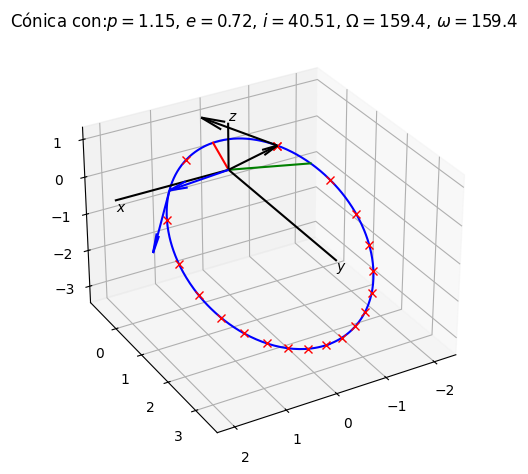

In [23]:
#Tiempo característico de la cónica
#Si la cónica es una elipse este es el período
from numpy import pi
T=2*pi/nmed

#Tiempos 
from numpy import linspace
ts=linspace(0,T,20)

#Solución a las e.d.m. del sistema
from pymcel.export import ncuerpos_solucion
rs,vs,rps,vps,constantes=ncuerpos_solucion(sistema,ts)

rs_num=rs[0,:,:]-rs[1,:,:]
vs_num=vs[0,:,:]-vs[1,:,:]

#Visualización de la cónica 
from numpy import pi
from pymcel.export import conica_de_elementos
fig=conica_de_elementos(p,e,i*180/pi,W*180/pi,w*180/pi,figreturn=True)
ax=fig.gca()
#Posición y velocidad inicial
ax.quiver(0,0,0,
          rvec[0],rvec[1],rvec[2],
          color='k');
ax.quiver(rvec[0],rvec[1],rvec[2],
          vvec[0],vvec[1],vvec[2],
          color='k');

#Posición y velocidad nueva
ax.quiver(0,0,0,
          r_nuevo[0],r_nuevo[1],r_nuevo[2],
          color='b');
ax.quiver(r_nuevo[0],r_nuevo[1],r_nuevo[2],
          v_nuevo[0],v_nuevo[1],v_nuevo[2],
          color='b');

#Posiciones calculadas numéricamente
ax.plot(rs_num[:,0],rs_num[:,1],rs_num[:,2],'rx');

fig.tight_layout()

<hr/>

Para explorar más cuadernos del libro vaya al [repositorio de en GitHub](https://github.com/seap-udea/pymcel/tree/main/ejemplos/cuadernos-libro)